In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import math
import os
import seaborn as sns

In [2]:
XG = pd.read_csv('XG_validation.csv')

In [85]:
RF = pd.read_csv('RandomForest_pCTR.csv')

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#new_validation = pd.read_csv('new_validation.csv')
validation =  pd.read_csv('validation.csv')

In [198]:
#basebids = np.linspace(1, 1000, 50) 

In [18]:
range_m = np.linspace(100, 150, 10) 

In [19]:
range_n =np.linspace(2, 6, 10) 

In [20]:
basebids = np.linspace(20, 350, 100) 

In [5]:
avgCTR= (train.loc[(train['click']==1)].click.sum())/train.shape[0]

In [6]:
avgCTR

0.0007375623256619447

In [7]:
def LinearStrategy(pCTR, base_bid,avgCTR):
    avgCTR = np.repeat(avgCTR*100, pCTR.shape[0])
    base_bid =  np.repeat(base_bid, pCTR.shape[0])
    bidprices  = (base_bid * pCTR['pCTR'])/ avgCTR
    return bidprices

In [239]:
# def Non_LinearStrategy(pCTR, base_bid,avgCTR,m,n):
#     avgCTR = np.repeat(avgCTR*100, pCTR.shape[0])
#     base_bid =  np.repeat(base_bid, pCTR.shape[0])
#     m= np.repeat(m, pCTR.shape[0])
#     n= np.repeat(n, pCTR.shape[0])
#     bidprices  =  base_bid  * ((pCTR['pCTR']/ avgCTR)**2) + m* (pCTR['pCTR']/ avgCTR) + n
#     return bidprices

In [155]:
# def Exp(pCTR, base_bid,avgCTR):
#     avgCTR = np.repeat(avgCTR*100, pCTR.shape[0])
#     base_bid =  np.repeat(base_bid, pCTR.shape[0])
#     bidprices  = base_bid  * np.exp(pCTR['pCTR']/ avgCTR)
#     return bidprices

In [8]:
#re-train base bid
def Evaluate(validation, pre_bidprices):
    
    bidprice = pre_bidprices
    budget = 6250000

    #find who wins the bid
    payprice = validation['payprice'].values
    win_bid = bidprice>payprice

    spend = np.cumsum(payprice*win_bid)
    enough_budget = spend<budget


    click =  np.sum(validation['click'].values*win_bid*enough_budget)
    impression = np.sum(win_bid*enough_budget)
    spend = np.max(spend*enough_budget)
    ctr = click/impression*100
    cpm = spend/impression*1000
    cpc = spend/click


    return [impression,click, ctr, spend, cpm, cpc]

In [1]:
k=0
results  = pd.DataFrame(columns = ["basebid","impression","click","ctr","spend","cpm","cpc","m","n"])     

for basebid in basebids:
    for m in range_m:
        for n in range_n:
            pre_bidprices = Non_LinearStrategy(XG, basebid,avgCTR,m,n)
            impression, click, ctr, spend, cpm, cpc = Evaluate(validation, pre_bidprices)
            results.loc[k]  = np.round(basebid,5) , impression, click, ctr, spend, cpm, cpc, m, n
            k = k+1

In [9]:
#linear 
k=0
results  = pd.DataFrame(columns = ["basebid","impression","click","ctr","spend","cpm","cpc"])     

for basebid in basebids:
    pre_bidprices = LinearStrategy(XG, basebid,avgCTR)
    impression, click, ctr, spend, cpm, cpc = Evaluate(validation, pre_bidprices)
    results.loc[k]  = np.round(basebid,5) , impression, click, ctr, spend, cpm, cpc
    k = k+1

/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexp

/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexp

/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexp

In [10]:
results.click.max()

170.0

In [11]:
best = results.loc[(results['click'] == 170)]

In [12]:
best

,basebid,impression,click,ctr,spend,cpm,cpc
51,190.0,126328.0,170.0,0.13457,6154455.0,48718.059338,36202.676471


In [262]:
results.to_csv("Linear_Bidding_Strategy.csv")

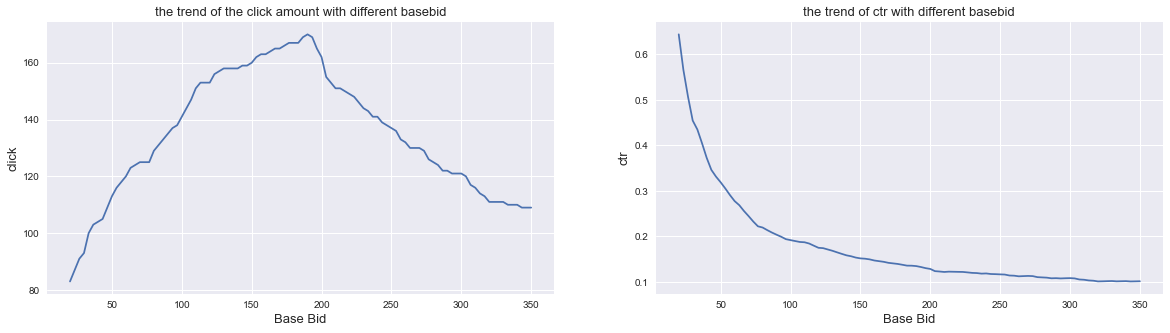

In [13]:
plt.figure(figsize = (20,5))


sns.set(color_codes=True)
plt.subplot(1,2,1)
plt.plot(results['basebid'], results["click"])
plt.xlabel("Base Bid",fontsize=13)
plt.ylabel("click",fontsize=13)
plt.title("the trend of the click amount with different basebid", fontsize=13)

plt.subplot(1,2,2)
plt.plot(results['basebid'], results["ctr"])
plt.xlabel("Base Bid",fontsize=13)
plt.ylabel("ctr",fontsize=13)
plt.title('the trend of ctr with different basebid', fontsize=13)


# plt.subplot(1,3,3)
# plt.plot(results['basebid'], results["spend"])
# plt.xlabel("Base Bid")
# plt.ylabel("spend")

# plt.subplot(2,3,4)
# plt.plot(results['basebid'], results["cpm"])
# plt.xlabel("Base Bid")
# plt.ylabel("cpm")


# plt.subplot(2,3,5)
# plt.plot(results['basebid'], results["cpc"])       
# plt.xlabel("Base Bid")
# plt.ylabel("cpc")
plt.savefig(os.path.join('figures', 'Linear.png'), format='png', dpi=300)

<font face="微软雅黑" size=6 color=#000000> Reserve 

In [6]:
validation_reserve = validation.iloc[::-1]
XG_reserve = XG.iloc[::-1]

In [18]:
k=0
results  = pd.DataFrame(columns = ["basebid","impression","click","ctr","spend","cpm","cpc"])     

for basebid in basebids:
    pre_bidprices = LinearStrategy(XG_reserve, basebid,avgCTR)
    impression, click, ctr, spend, cpm, cpc = Evaluate(validation_reserve, pre_bidprices)
    results.loc[k]  = np.round(basebid,5) , impression, click, ctr, spend, cpm, cpc
    k = k+1

/Users/sue/anaconda3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [20]:
results.click.max()

169.0

In [21]:
best = results.loc[(results['click'] == 169)]

In [22]:
best

,basebid,impression,click,ctr,spend,cpm,cpc
51,190.0,130980.0,169.0,0.129027,6235867.0,47609.306764,36898.621302


<font face="微软雅黑" size=6 color=#000000> run on validation 

In [99]:
bidprices = LinearStrategy(XG,183.33333,avgCTR)

In [100]:
Group_17 = pd.DataFrame(data = list(zip(validation["bidid"], bidprices)),
                               columns = ["bidid", "bidprice"])

In [101]:
Group_17.head()

,bidid,bidprice
0,bbcb813b6166538503d8b33a5602d7d72f6019dc,15.359426
1,5a07316c49477cb5d9b4d5aa39c27d6c3be7f92d,15.303452
2,f6ece71dae81d6b16bfb24ad6dd5611472d4c673,7.144124
3,b4d5c57c9b38ff5a12954fa01e11931b4e6bfbbb,7.654425
4,0899bf144249458ea9c89188473694bf44c7ca15,15.598276


In [102]:
Group_17.to_csv("Group_17.csv")

<font face="微软雅黑" size=6 color=#000000> Combine Linear and Square

In [16]:
bidprices_linear = LinearStrategy(XG, 190,avgCTR)

In [ ]:
bidprices_square = Non_LinearStrategy(XG, basebid,avgCTR,m,n)